# Linear regression
one predictor to one predictand

$$ y = \beta_0 + \beta_1 x $$

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg, stats
import matplotlib.pyplot as plt

In [2]:
# Read time series data
f = 'data/era5_nino.csv'
df = pd.read_csv(f, index_col=0, parse_dates=True)

# Define predictor and predictand
x = df['nino3'].values
y = df['nino4'].values
n = len(x)

# Effective sample size
rx = stats.pearsonr(x[1:], x[:-1]).statistic
ry = stats.pearsonr(y[1:], y[:-1]).statistic
n_eff = n * (1 - rx*ry) / (1 + rx*ry)

print(f'Number of samples = {n}')
print(f'Effective sample size: {n_eff:.1f}')

Number of samples = 1008
Effective sample size: 66.0


### Linear regression by [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
Useful only for two sets of time series data

In [3]:
res = stats.linregress(x, y)
print(res)

LinregressResult(slope=np.float64(0.5693047049528773), intercept=np.float64(-6.8640681916705e-07), rvalue=np.float64(0.7752473813037888), pvalue=np.float64(6.244804480311099e-203), stderr=np.float64(0.014624711089482692), intercept_stderr=np.float64(0.011672455437990606))


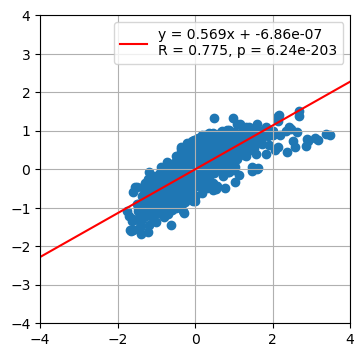

In [4]:
xx = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x, y)
ax.plot(
    xx, xx * res.slope + res.intercept, 'r',
    label=f'y = {res.slope:.3g}x + {res.intercept:.3g}\n'
          f'R = {res.rvalue:.3g}, p = {res.pvalue:.3g}'
)
        
ax.grid()
ax.set(xlim=(-4, 4), ylim=(-4, 4))
ax.legend()

### More general method by [scipy.linalg.lstq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html)

Solves 
$$y = Ap = \begin{bmatrix} x & 1 \end{bmatrix} \begin{bmatrix} \beta_1 \\ \beta_0 \end{bmatrix} = \beta_0 + \beta_1 x $$

where 
$ A = \begin{bmatrix} x & 1 \end{bmatrix} $,
$ p = \begin{bmatrix} \beta_1 \\ \beta_0 \end{bmatrix} $

In [5]:
A = np.stack([x, np.ones(len(x))], axis=-1)
print(f'{A.shape = :}')
print(A[:5])

A.shape = (1008, 2)
[[0.77482826 1.        ]
 [0.91584975 1.        ]
 [0.96427315 1.        ]
 [0.48696518 1.        ]
 [1.1274626  1.        ]]


In [6]:
p, res, rnk, s = linalg.lstsq(A, y)

print(f'p = {p}')
print(f'Sums of squared residuals = {res}')
print(f'Rank of matrix A (number of linearly independent columns): {rnk}')
print(f'Singular values of A: {s}')

p = [ 5.69304705e-01 -6.86406819e-07]
Sums of squared residuals = 138.16020279356803
Rank of matrix A (number of linearly independent columns): 2
Singular values of A: [31.74901573 25.33991742]


Reconstruct y

In [7]:
y_recon = A @ p

# sum of squared residuals
print(f'Sums of squared residuals = {((y - y_recon)**2).sum()}')

Sums of squared residuals = 138.16020279356803


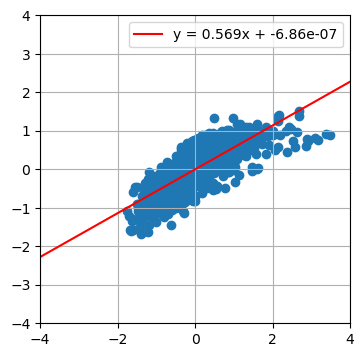

In [8]:
xx = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x, y)
ax.plot(
    xx, xx * p[0] + p[1], c='r',
    label=f'y = {p[0]:.3g}x + {p[1]:.3g}'
)
        
ax.grid()
ax.set(xlim=(-4, 4), ylim=(-4, 4))
ax.legend()